# Read a TIF file, create a mesh grid and plot the variable in Cartopy

In this notebook we open a TIF file, we flip it upside down for accuracy purposes, we create a mesh grid using the length of the variable and the boundaries of the TIF file and we plot the outcome using the Cartopy package. 

We first load useful libraries

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import rasterio

/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


We open the dataset using Rasterio

In [5]:
dat = rasterio.open(r"../../DATA/chile_esa_cci.tif")
dat.read()

array([[[210, 210, 210, ..., 120, 120, 120],
        [210, 210, 210, ..., 120, 120,  30],
        [210, 210, 210, ..., 120,  30,  30],
        ...,
        [210, 210, 210, ..., 120, 100, 100],
        [210, 210, 210, ..., 100, 120, 100],
        [210, 210, 210, ..., 100, 100, 100]]], dtype=uint8)

We define the variable as the first element in the time dimension. 

In [6]:
maparray = dat.read()[0]

We flip the array upside down for accuracy

In [7]:
maparray = np.flipud(maparray) 

We create a grid with the native longitudes and latitudes from the boundaries

In [8]:
loni = np.linspace(dat.bounds.left, dat.bounds.right,len(maparray[0]))
lati = np.linspace(dat.bounds.bottom, dat.bounds.top,len(maparray))
lons, lats = np.meshgrid(loni,lati)

We plot the variable using the Cartopy projection

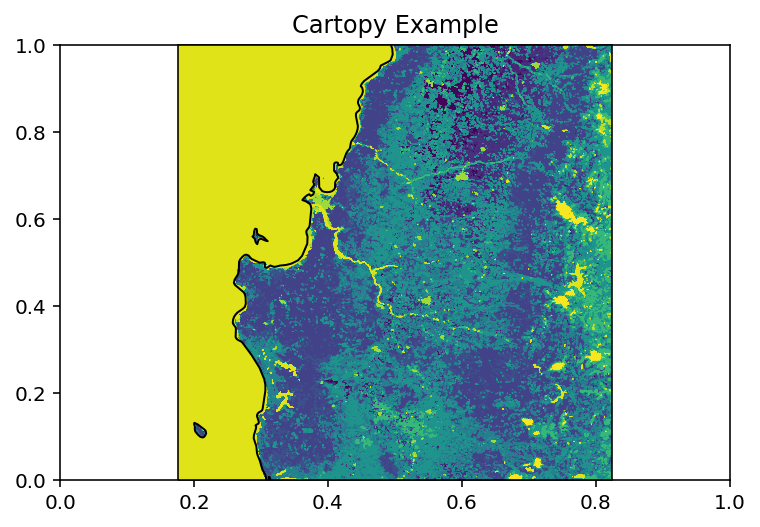

In [10]:
fig,ax = plt.subplots(dpi=144)
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lons, lats, maparray, 60,
             transform=ccrs.PlateCarree())
ax.coastlines()
plt.title('Cartopy Example')
plt.show()